# Sobre o pré-processamento de dados
> Stack Academy
***

## Removendo valores discrepantes

In [1]:
# Importando módulo para manipulações númericas
import numpy as np

In [2]:
# Definindo valores reais dos dados
array1 = [np.random.randint(500, 1000) for _ in range(500)]

# Definindo valores discrepantes acima
array2 = [np.random.randint(2000, 3000) for _ in range(30)]

# Definindo valores discrepantes abaixo
array3 = [np.random.randint(-1000, -500) for _ in range(30)]

# Definindo array
array = array1 + array2 + array3

In [3]:
# Módulo para plotagem de gráficos
import seaborn as sns

# Definindo estilo dos gráficos
sns.set_style('whitegrid')

<AxesSubplot:>

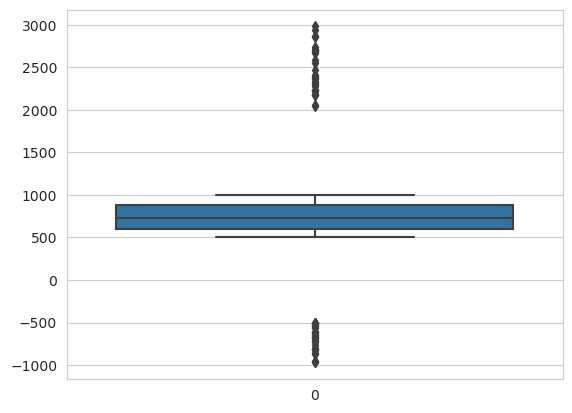

In [4]:
# Visualizando os dados em um box-plot
sns.boxplot(data = array)

In [5]:
# Definindo média e desvio padrão
media = np.mean(array)
desvio_padrao = np.std(array)

In [6]:
# Definindo limite negativo
a = media - 2 * desvio_padrao

In [7]:
# Definindo limite positivo
b = media + 2 * desvio_padrao

In [8]:
# Visualizando dados discrepantes I
for x in array:
    if x < a:
        print(x, end=',')

-968,-665,-607,-510,-813,-814,-698,-611,-722,-969,-535,-533,-692,-608,-803,-948,-828,-875,-512,-511,-672,-560,-861,-546,-646,-501,-635,-727,-669,-762,

In [9]:
# Visualizando dados discrepantes II
for x in array:
    if x > b:
        print(x, end=',')

2047,2054,2222,2544,2327,2384,2717,2687,2188,2300,2237,2685,2663,2176,2231,2857,2473,2689,2739,2979,2368,2328,2583,2414,2171,2364,2396,2872,2935,2283,

In [10]:
# Removendo dados discrepantes I
array = [x for x in array if x > a]

In [11]:
# Removendo dados discrepantes II
array = [x for x in array if x < b]

<AxesSubplot:>

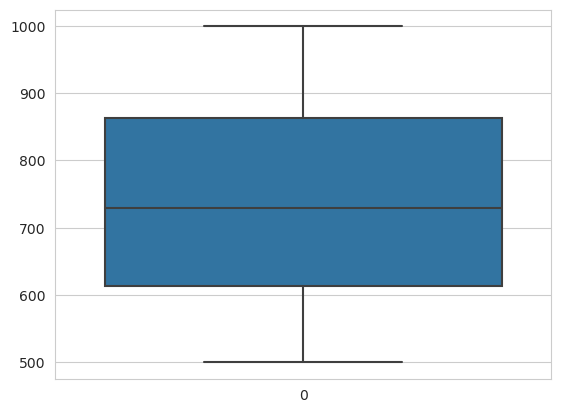

In [12]:
# Visualizando dados limpos
sns.boxplot(data = array)

## Categorização de dados

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('kc_house_data.csv')

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [19]:
df['floors_labels'] = pd.cut(df['floors'], 5, labels = ['PP', 'P', 'M', 'G', 'GG'])

In [21]:
df['floors_labels'].value_counts()

PP    12590
P      8241
G       613
M       161
GG        8
Name: floors_labels, dtype: int64

## Normalização de dados

In [37]:
import pandas as pd
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [38]:
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

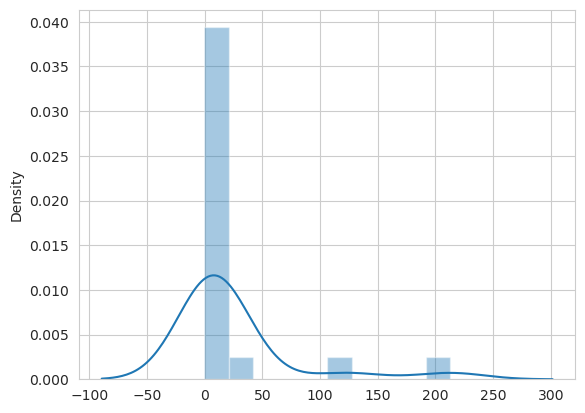

In [41]:
data = np.array([1, 10, 3, 1, 2, 4, -0.8, 3, 10, 2, 11, 18, 19, 2, 123, 213, 10, 33, 12])
sns.distplot(data, bins = 10)

In [51]:
normalizer = Normalizer().fit([data])

In [55]:
data_norm = normalizer.transform([data])

<AxesSubplot:ylabel='Density'>

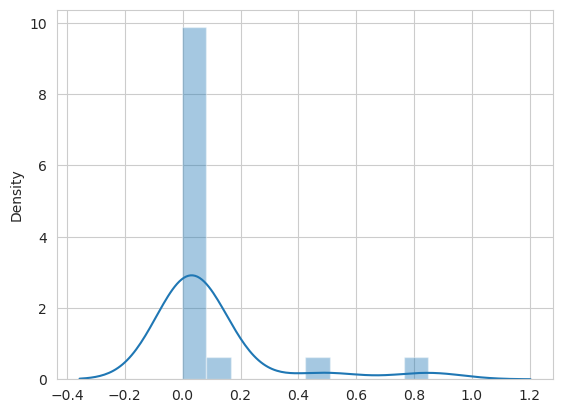

In [60]:
sns.distplot(data_norm.reshape(-1), bins = 10)

## Standard

In [78]:
data = np.random.normal(size = 50)

<AxesSubplot:ylabel='Density'>

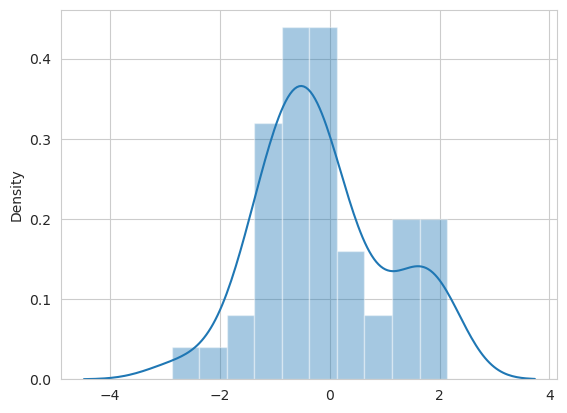

In [79]:
sns.distplot(data, bins = 10)

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler().fit(data.reshape(-1, 1))

In [91]:
data2 = scaler.transform(data.reshape(-1, 1))

<AxesSubplot:ylabel='Density'>

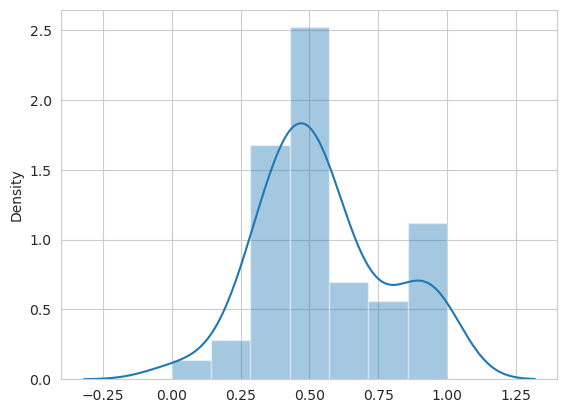

In [92]:
sns.distplot(data2)

In [94]:
matrix = [
    [2, 3, 5],
    [7, 11, 13],
    [17, 19, 23]
]
matrix = np.array(matrix)

In [105]:
matrix.reshape(1, 1)

ValueError: cannot reshape array of size 9 into shape (1,1)